# Visualization in the protein space

In [2]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import komet
import torch
import pickle
import numpy as np
import sklearn.manifold
import matplotlib.pyplot as plt

cpu


## Comparison of the coverage of the protein space for LCIdb and other databases

### 1. Load datas

#### BindingDB dataset

In [3]:
data_dir = './data/'
path_data_set = 'BindingDB'
dataset_dir = data_dir + path_data_set

# load data
train_BindingDB = komet.load_df("train.csv",dataset_dir)
val_BindingDB = komet.load_df("val.csv",dataset_dir)
test_BindingDB = komet.load_df( "test.csv",dataset_dir)

# dataframe full has all smiles and fasta sequences
full_BindingDB = pd.concat([train_BindingDB, val_BindingDB, test_BindingDB])
print("full shape",full_BindingDB.shape)
full_BindingDB.head()

number of smiles to clean: 0
train.csv shape (12668, 5)


[10:55:53] Explicit valence for atom # 22 N, 4, is greater than permitted
[10:55:53] Explicit valence for atom # 22 N, 4, is greater than permitted


number of smiles to clean: 2
val.csv shape (6642, 5)


[10:55:54] Explicit valence for atom # 22 N, 4, is greater than permitted
[10:55:54] Explicit valence for atom # 22 N, 4, is greater than permitted
[10:55:54] Explicit valence for atom # 22 N, 4, is greater than permitted


number of smiles to clean: 4
test.csv shape (13285, 5)
full shape (32595, 5)


[10:55:54] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20 21 22 23 25


,SMILES,Target Sequence,Label,drug_encoding,target_encoding
0,Cc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,1,[0. 0. 0. ... 0. 0. 0.],[5. 2.692 3.846 ... 0. 0. 0. ]
1,COc1ccc(CNS(=O)(=O)c2ccc(s2)S(N)(=O)=O)cc1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,1,[0. 0. 0. ... 0. 0. 0.],[5. 2.692 3.846 ... 0. 0. 0. ]
2,NS(=O)(=O)c1ccc(s1)S(=O)(=O)NCc1cccs1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,1,[0. 0. 0. ... 0. 0. 0.],[5. 2.692 3.846 ... 0. 0. 0. ]
3,NS(=O)(=O)c1cc2C(O)CN(Cc3cccs3)S(=O)(=O)c2s1,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,1,[0. 0. 0. ... 0. 0. 0.],[5. 2.692 3.846 ... 0. 0. 0. ]
4,COc1ccc(cc1)N1CC(O)c2cc(sc2S1(=O)=O)S(N)(=O)=O,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,1,[0. 0. 0. ... 0. 0. 0.],[5. 2.692 3.846 ... 0. 0. 0. ]


In [4]:
# list of smiles
smiles_BindingDB = full_BindingDB[['SMILES']].drop_duplicates().values.flatten()
print("number of smiles",len(smiles_BindingDB))

# list of fasta sequences
fastas_BindingDB = full_BindingDB[['Target Sequence']].drop_duplicates().values.flatten()
print("number of sequences",len(fastas_BindingDB))

full_BindingDB[['Label']].value_counts()


number of smiles 7161
number of sequences 1254


Label
0        23429
1         9166
dtype: int64

#### LCIdb dataset

In [5]:
path_data_set = 'CC/full_data_S1'
dataset_dir = data_dir + path_data_set

# load data
train_LCIdb = komet.load_df("train.csv",dataset_dir)
val_LCIdb = komet.load_df("val.csv",dataset_dir)
test_LCIdb = komet.load_df( "test.csv",dataset_dir)

# dataframe full has all smiles and fasta sequences
full_LCIdb = pd.concat([train_LCIdb, val_LCIdb, test_LCIdb])
print("full shape",full_LCIdb.shape)
full_LCIdb.head()

number of smiles to clean: 0
train.csv shape (644060, 3)
number of smiles to clean: 0
val.csv shape (64408, 3)
number of smiles to clean: 0
test.csv shape (96608, 3)
full shape (805076, 3)


,SMILES,Target Sequence,Label
0,NS(=O)(=O)c1ccc(CCNC(=S)N[C@@H]2O[C@H](CO)[C@@...,MSHHWGYGKHNGPEHWHKDFPIAKGERQSPVDIDTHTAKYDPSLKP...,1
1,NS(=O)(=O)c1ccc(CCNC(=S)N[C@@H]2O[C@H](CO)[C@@...,MQYLNIKEDCNAMAFCAKMRSSKKTEVNLEAPEPGVEVIFYLSDRE...,0
2,NS(=O)(=O)c1ccc(CCNC(=S)N[C@@H]2O[C@H](CO)[C@@...,MPPGVDCPMEFWTKEENQSVVVDFLLPTGVYLNFPVSRNANLSTIK...,0
3,NS(=O)(=O)c1ccc(CCNC(=S)N[C@@H]2O[C@H](CO)[C@@...,MASPDWGYDDKNGPEQWSKLYPIANGNNQSPVDIKTSETKHDTSLK...,1
4,NS(=O)(=O)c1ccc(CCNC(=S)N[C@@H]2O[C@H](CO)[C@@...,MLFSALLLEVIWILAADGGQHWTYEGPHGQDHWPASYPECGNNAQS...,1


In [6]:
# list of smiles
smiles_LCIdb = full_LCIdb[['SMILES']].drop_duplicates().values.flatten()
print("number of smiles",len(smiles_LCIdb))

# list of fasta sequences
fastas_LCIdb = full_LCIdb[['Target Sequence']].drop_duplicates().values.flatten()
print("number of sequences",len(fastas_LCIdb))

full_LCIdb[['Label']].value_counts()

number of smiles 274515
number of sequences 2069


Label
0        402538
1        402538
dtype: int64

#### Biosnap dataset

In [7]:
path_data_set = 'BIOSNAP/full_data'
dataset_dir = data_dir + path_data_set

# load data
train_Biosnap = komet.load_df("train.csv",dataset_dir)
val_Biosnap = komet.load_df("val.csv",dataset_dir)
test_Biosnap = komet.load_df( "test.csv",dataset_dir)

# dataframe full has all smiles and fasta sequences
full_Biosnap = pd.concat([train_Biosnap, val_Biosnap, test_Biosnap])
print("full shape",full_Biosnap.shape)
full_Biosnap.head()

[10:57:22] Unusual charge on atom 0 number of radical electrons set to zero


number of smiles to clean: 0
train.csv shape (19238, 7)
number of smiles to clean: 0
val.csv shape (2748, 7)
number of smiles to clean: 0
test.csv shape (5497, 7)
full shape (27483, 7)


[10:57:23] Unusual charge on atom 0 number of radical electrons set to zero


,Unnamed: 0,Unnamed: 0.1,DrugBank ID,Gene,Label,SMILES,Target Sequence
0,3,4,DB08533,P49862,0.0,CC1=CN=C2N1C=CN=C2NCC1=CC=NC=C1,MARSLLLPLQILLLSLALETAGEEAQGDKIIDGAPCARGSHPWQVA...
1,4,5,DB00755,P48443,1.0,C\C(\C=C\C1=C(C)CCCC1(C)C)=C/C=C/C(/C)=C/C(O)=O,MYGNYSHFMKFPAGYGGSPGHTGSTSMSPSAALSTGKPMDSHPSYT...
2,5,6,DB00361,O60218,0.0,[H][C@@]12N(C)C3=CC(OC)=C(C=C3[C@@]11CCN3CC=C[...,MATFVELSTKAKMPIVGLGTWKSPLGKVKEAVKVAIDAGYRHIDCA...
3,7,8,DB01136,P08588,1.0,COC1=CC=CC=C1OCCNCC(O)COC1=CC=CC2=C1C1=CC=CC=C1N2,MGAGVLVLGASEPGNLSSAAPLPDGAATAARLLVPASPPASLLPPA...
4,8,9,DB06963,Q9Y691,0.0,[H][C@@](C)(NC1=CC2=C(C=N1)C(C)=NN2C1=CC=CC(CC...,MFIWTSGRTSSSYRHDEKRNIYQKIRDHDLLDKRKTVTALKAGEDR...


In [8]:
# list of smiles
smiles_Biosnap = full_Biosnap[['SMILES']].drop_duplicates().values.flatten()
print("number of smiles",len(smiles_Biosnap))

# list of fasta sequences
fastas_Biosnap = full_Biosnap[['Target Sequence']].drop_duplicates().values.flatten()
print("number of sequences",len(fastas_Biosnap))

full_Biosnap[['Label']].value_counts()

number of smiles 4510
number of sequences 2181


Label
1.0      13836
0.0      13647
dtype: int64

### 2. Fastas

In [9]:

L_prot_LCIdb = list(full_LCIdb["Target Sequence"].drop_duplicates())
L_prot_BindingDB_full = list(full_BindingDB["Target Sequence"].drop_duplicates())
L_prot_Biosnap = list(full_Biosnap["Target Sequence"].drop_duplicates())

L_prot_total = list( set(L_prot_LCIdb)  | set(L_prot_BindingDB_full) | set(L_prot_Biosnap))
print("nombre total de fasta",len(L_prot_total))

nombre total de fasta 3760


In [10]:
L_fasta_total = L_prot_LCIdb +  L_prot_Biosnap + L_prot_BindingDB_full
print("nombre de fasta en concaténant les 3 listes",len(L_fasta_total))
nb_prot = len(L_fasta_total)

nombre de fasta en concaténant les 3 listes 5504


<Axes: >

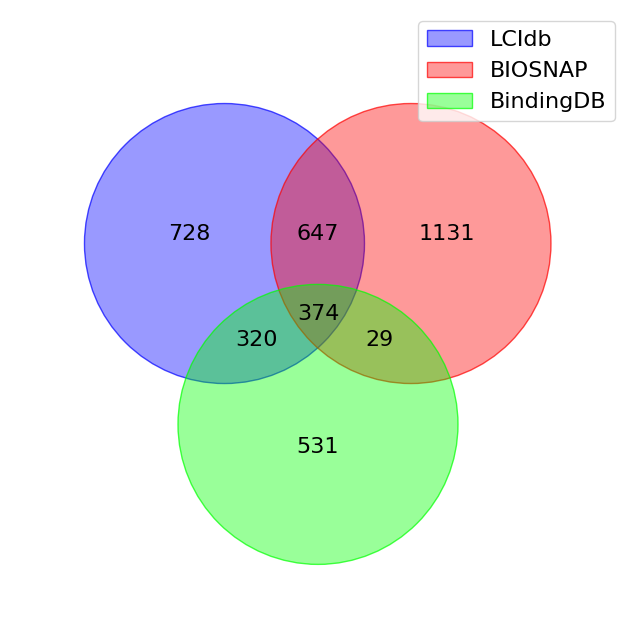

In [11]:
from venn import venn
venn({'LCIdb': set(L_prot_LCIdb),  'BIOSNAP': set(L_prot_Biosnap), 'BindingDB': set(L_prot_BindingDB_full)}, cmap='brg', fontsize=16)

### 3. Features with Uniprot LAkernel

In [7]:
# Load Precomputed kernel and dict for the proteins
dict_ind2fasta_all = pickle.load(open(data_dir + "/dict_ind2fasta_all.data", 'rb'))
dict_fasta2ind_all = {fasta:ind for ind,fasta in dict_ind2fasta_all.items()}
U = torch.from_numpy(np.load(data_dir + "U_small.npy"))
Lambda = torch.from_numpy(np.load(data_dir + "Lambda_small.npy"))

#dict_ind2fasta_all = pickle.load(open("data/dict_ind2fasta_all.data", 'rb'))
#dict_fasta2ind_all = {fasta:ind for ind,fasta in dict_ind2fasta_all.items()}
#U = torch.from_numpy(np.load("data/U_small.npy"))
#Lambda = torch.from_numpy(np.load("data/Lambda_small.npy"))
print("U.shape",U.shape,"Lambda.shape",Lambda.shape)

U.shape torch.Size([20605, 1200]) Lambda.shape torch.Size([1200])


In [8]:
# Load features for protein 
dP = min(U.shape[0],1200)
Y_all = U[:,:dP] @ torch.diag(torch.sqrt(Lambda[:dP]))
Y_all = U[:,:dP] @ torch.diag(torch.sqrt(Lambda[:dP]))

# Protein kernel for the dataset
I_fasta = [dict_fasta2ind_all[L_fasta_total[i]] for i in range(len(L_fasta_total))] # index of fasta in the precomputed dict and protein kernel, in the same order as the dataset
Y = Y_all[I_fasta,:]
print("Y shape",Y.shape)

mytype=torch.float32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Y = Y.to(device)
# nomramlisation of the features
Y_c = Y - Y.mean(axis = 0)
Y_cn = Y_c / torch.norm(Y_c,dim = 1)[:,None]

NameError: name 'L_fasta_total' is not defined

### 4. Visualisation using T-SNE on different datasets

In [14]:
# Visualisation using T-SNE

perp = 50 # increase for less randomness
Y_T = sklearn.manifold.TSNE(n_components=2, perplexity=perp).fit_transform(Y_cn.numpy())

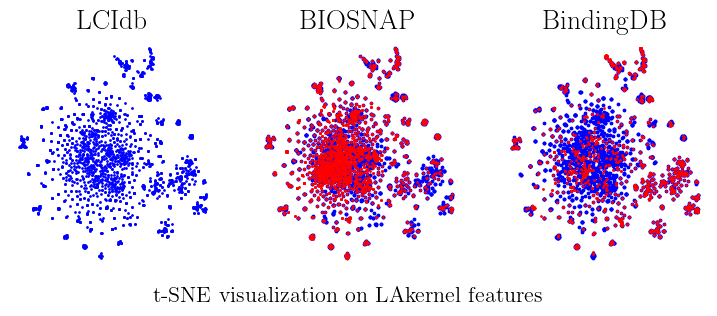

In [15]:
import matplotlib.patches as mpatches

n_LCIdb = len(L_prot_LCIdb)
n_Biosnap = len(L_prot_Biosnap)
n_BindingDB_full = len(L_prot_BindingDB_full)

plt.rc('font', family="Times New Roman")
plt.rc('text', usetex=True)

# faire 3 figures cote à cote
fig, axes = plt.subplots(1, 3, figsize=(9, 3))
axes[0].scatter(Y_T[:n_LCIdb,0], Y_T[:n_LCIdb,1],c = 'blue',s=1,label = 'LCIdb proteins');
axes[0].set_title(r'LCIdb',fontsize=20)
axes[0].axis('off')


axes[1].scatter(Y_T[:n_LCIdb,0], Y_T[:n_LCIdb,1],c = 'blue',s=3,label = 'prot in LCIdb');
axes[1].scatter(Y_T[(n_LCIdb):(n_LCIdb+n_Biosnap),0], Y_T[(n_LCIdb):(n_LCIdb+n_Biosnap),1],c = 'r',s=1,label = 'prot in Biosnap');
axes[1].axis('off')
axes[1].set_title(r'BIOSNAP',fontsize=20)

axes[2].scatter(Y_T[:n_LCIdb,0], Y_T[:n_LCIdb,1],c = 'blue',s=3,label = 'prot in LCIdb');
axes[2].scatter(Y_T[(n_LCIdb+n_Biosnap):,0], Y_T[(n_LCIdb+n_Biosnap):,1],c = 'r',s=1,label = 'prot in BindingDB');
axes[2].axis('off')
axes[2].set_title(r'BindingDB',fontsize=20)

# titre
plt.suptitle("t-SNE visualization on LAkernel features", fontsize=16, y=0.05)


plt.show()

## Visualisation using T-SNE on different proteins family on LCIdb

In [3]:
# add uniprot id to the dataframe
LCIdb = pd.read_csv(data_dir + "LCIdb.csv") # load the dataframe from Zenodo
LCIdb.head()

,smiles,fasta,ChEMBL ID,PubChem ID,IUPHAR ID,Ligand names,Target,uniprot,mean,mean pIC50,...,min pIC50,min pKi,min pKd,max,max pIC50,max pKi,max pKd,score,indsmiles,indfasta
0,BrC1CCN(Cc2ccc(OCCCN3CCCCC3)cc2)CC1,MERAPPDGPLNASGALAGEAAAAGGARGFSAAWTAVLAALMALLIV...,CHEMBL472466,44592131.0,NaN,4-bromo-1-(4-(3-(piperidin-1-yl)propoxy)benzyl...,hrh3,Q9Y5N1,9.7,NaN,...,NaN,9.7,NaN,9.7,NaN,9.7,NaN,1.0,0.0,0.0
1,BrCC(Br)C1CCC(Br)C(Br)C1,MEVQLGLGRVYPRPPSKTYRGAFQNLFQSVREVIQNPGPRHPEAAS...,CHEMBL375107,18728.0,NaN,"1,2-dibromo-4-(1,2-dibromoethyl)cyclohexane\nn...",ar,P10275,7.4,7.4,...,7.4,NaN,NaN,7.4,7.4,NaN,NaN,1.0,1.0,1.0
2,BrC[C@H]1CC[C@H](c2nnn3cnc4[nH]ccc4c23)CC1,MAPPSEETPLIPQRSCSLLSTEAGALHVLLPARGPGPPQRLSFSFG...,CHEMBL3918308,136641870.0,NaN,"us9216999, 74",jak3,P52333,7.1,7.1,...,7.1,NaN,NaN,7.1,7.1,NaN,NaN,1.0,2.0,2.0
3,BrC[C@H]1CC[C@H](c2nnn3cnc4[nH]ccc4c23)CC1,MGMACLTMTEMEGTSTSSIYQNGDISGNANSMKQIDPVLQVYLYHS...,CHEMBL3918308,136641870.0,NaN,"us9216999, 74",jak2,O60674,8.5,8.5,...,8.5,NaN,NaN,8.5,8.5,NaN,NaN,1.0,2.0,3.0
4,BrC[C@H]1CC[C@H](c2nnn3cnc4[nH]ccc4c23)CC1,MPLRHWGMARGSKPVGDGAQPMAAMGGLKVLLHWAGPGGGEPWVTF...,CHEMBL3918308,136641870.0,NaN,"us9216999, 74",tyk2,P29597,8.6,8.6,...,8.6,NaN,NaN,8.6,8.6,NaN,NaN,1.0,2.0,4.0


In [18]:
df_prot_LCIdb = LCIdb[['uniprot',"fasta"]].drop_duplicates()
df_prot_LCIdb.shape

(2071, 2)

In [20]:
L_prot_LCIdb = list(df_prot_LCIdb["fasta"])
len(L_prot_LCIdb)

2071

The file similar.txt is available at https://www.uniprot.org/
There is a new Swiss-Prot document: similar.txt : Index of CC SIMILARITY lines. This index lists all names of families and domains occurring in CC SIMILARITY lines of Swiss-Prot entries.

In [21]:
def f(x):
    if "family" in x:
        if "superfamily" in x:
            try:
                return x.split(".")[0] +" -"+ x.split(".")[1]
            except :
                return x
            #return x.split(".")[0] +" -"+ x.split(".")[1]
        if "subfamily" in x:
            return x.split(".")[0]
        #if "peptidase" in x:
        #    return "peptidase family"
        #if "SAM-binding methyltransferase superfamily" in x:
        #    return "SAM-binding methyltransferase superfamily"
        else:
            return x.strip('\n')
    else:
        return x
    
    
def find_family(uniprot_id):
    file_path = './data/similar.txt'
    with open(file_path, 'r') as file:
        lines = file.readlines()

    family_dict = {}
    current_family = None
    list_uniprots = []

    for line in lines:
        # Check if the line contains the word 'family'
        if 'family' in line:
            current_family = line
            
        elif '(' in line:
            #If the line contains a parentheses, it could contain UniProts in parentheses
            parts = line.split(',')
            parts = [part.strip() for part in parts]
            parts = [part.strip('()')[-6:] for part in parts]
            if uniprot_id in parts:
                return f(current_family)

    # If UniProt is not found
    return "Not known"




In [22]:
df_prot_LCIdb["family"] = df_prot_LCIdb["uniprot"].apply(lambda x: find_family(x))
df_prot_LCIdb["family"].value_counts()

G-protein coupled receptor 1 family                                181
Not known                                                          154
protein kinase superfamily - Tyr protein kinase family              75
protein kinase superfamily - CMGC Ser/Thr protein kinase family     50
peptidase S1 family                                                 47
                                                                  ... 
ADRM1 family                                                         1
DSS1/SEM1 family                                                     1
proteasome subunit S10 family                                        1
proteasome subunit S3 family                                         1
camello family                                                       1
Name: family, Length: 565, dtype: int64

In [23]:
df_family = pd.DataFrame(df_prot_LCIdb["family"].value_counts())
# change the index to a column named family
df_family.reset_index(inplace=True)
df_family.columns = ["family","count"]
#df_family[df_family["count"] > 5]
# to make the color, I add a column with None if count < 10
df_prot_LCIdb["family_2"] = df_prot_LCIdb["family"].apply(lambda x: x if x in df_family[df_family["count"] > 5]["family"].to_list() else "family too small")
df_prot_LCIdb["family_2"].value_counts()


family too small                                                   793
G-protein coupled receptor 1 family                                181
Not known                                                          154
protein kinase superfamily - Tyr protein kinase family              75
protein kinase superfamily - CMGC Ser/Thr protein kinase family     50
                                                                  ... 
class-I aminoacyl-tRNA synthetase family                             7
ARTD/PARP family                                                     7
aldo/keto reductase family                                           7
major facilitator (TC 2 -A                                           6
IAP family                                                           6
Name: family_2, Length: 61, dtype: int64

In [29]:
# Protein kernel for the dataset
I_fasta_LCIdb = [dict_fasta2ind_all[L_prot_LCIdb[i]] for i in range(len(L_prot_LCIdb))] # index of fasta in the precomputed dict and protein kernel, in the same order as the dataset
Y_LCIdb = Y_all[I_fasta_LCIdb,:]
print("Y shape",Y_LCIdb.shape)

mytype=torch.float32
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Y_LCIdb = Y_LCIdb.to(device)
# nomramlisation of the features
Y_LCIdb_c = Y_LCIdb - Y_LCIdb.mean(axis = 0)
Y_LCIdb_cn = Y_LCIdb_c / torch.norm(Y_LCIdb_c,dim = 1)[:,None]

# Visualisation using T-SNE
perp = 30 # increase for less randomness
Y_LCIdb_T = sklearn.manifold.TSNE(n_components=2, perplexity=perp).fit_transform(Y_LCIdb_cn.numpy())



Y shape torch.Size([2071, 1200])


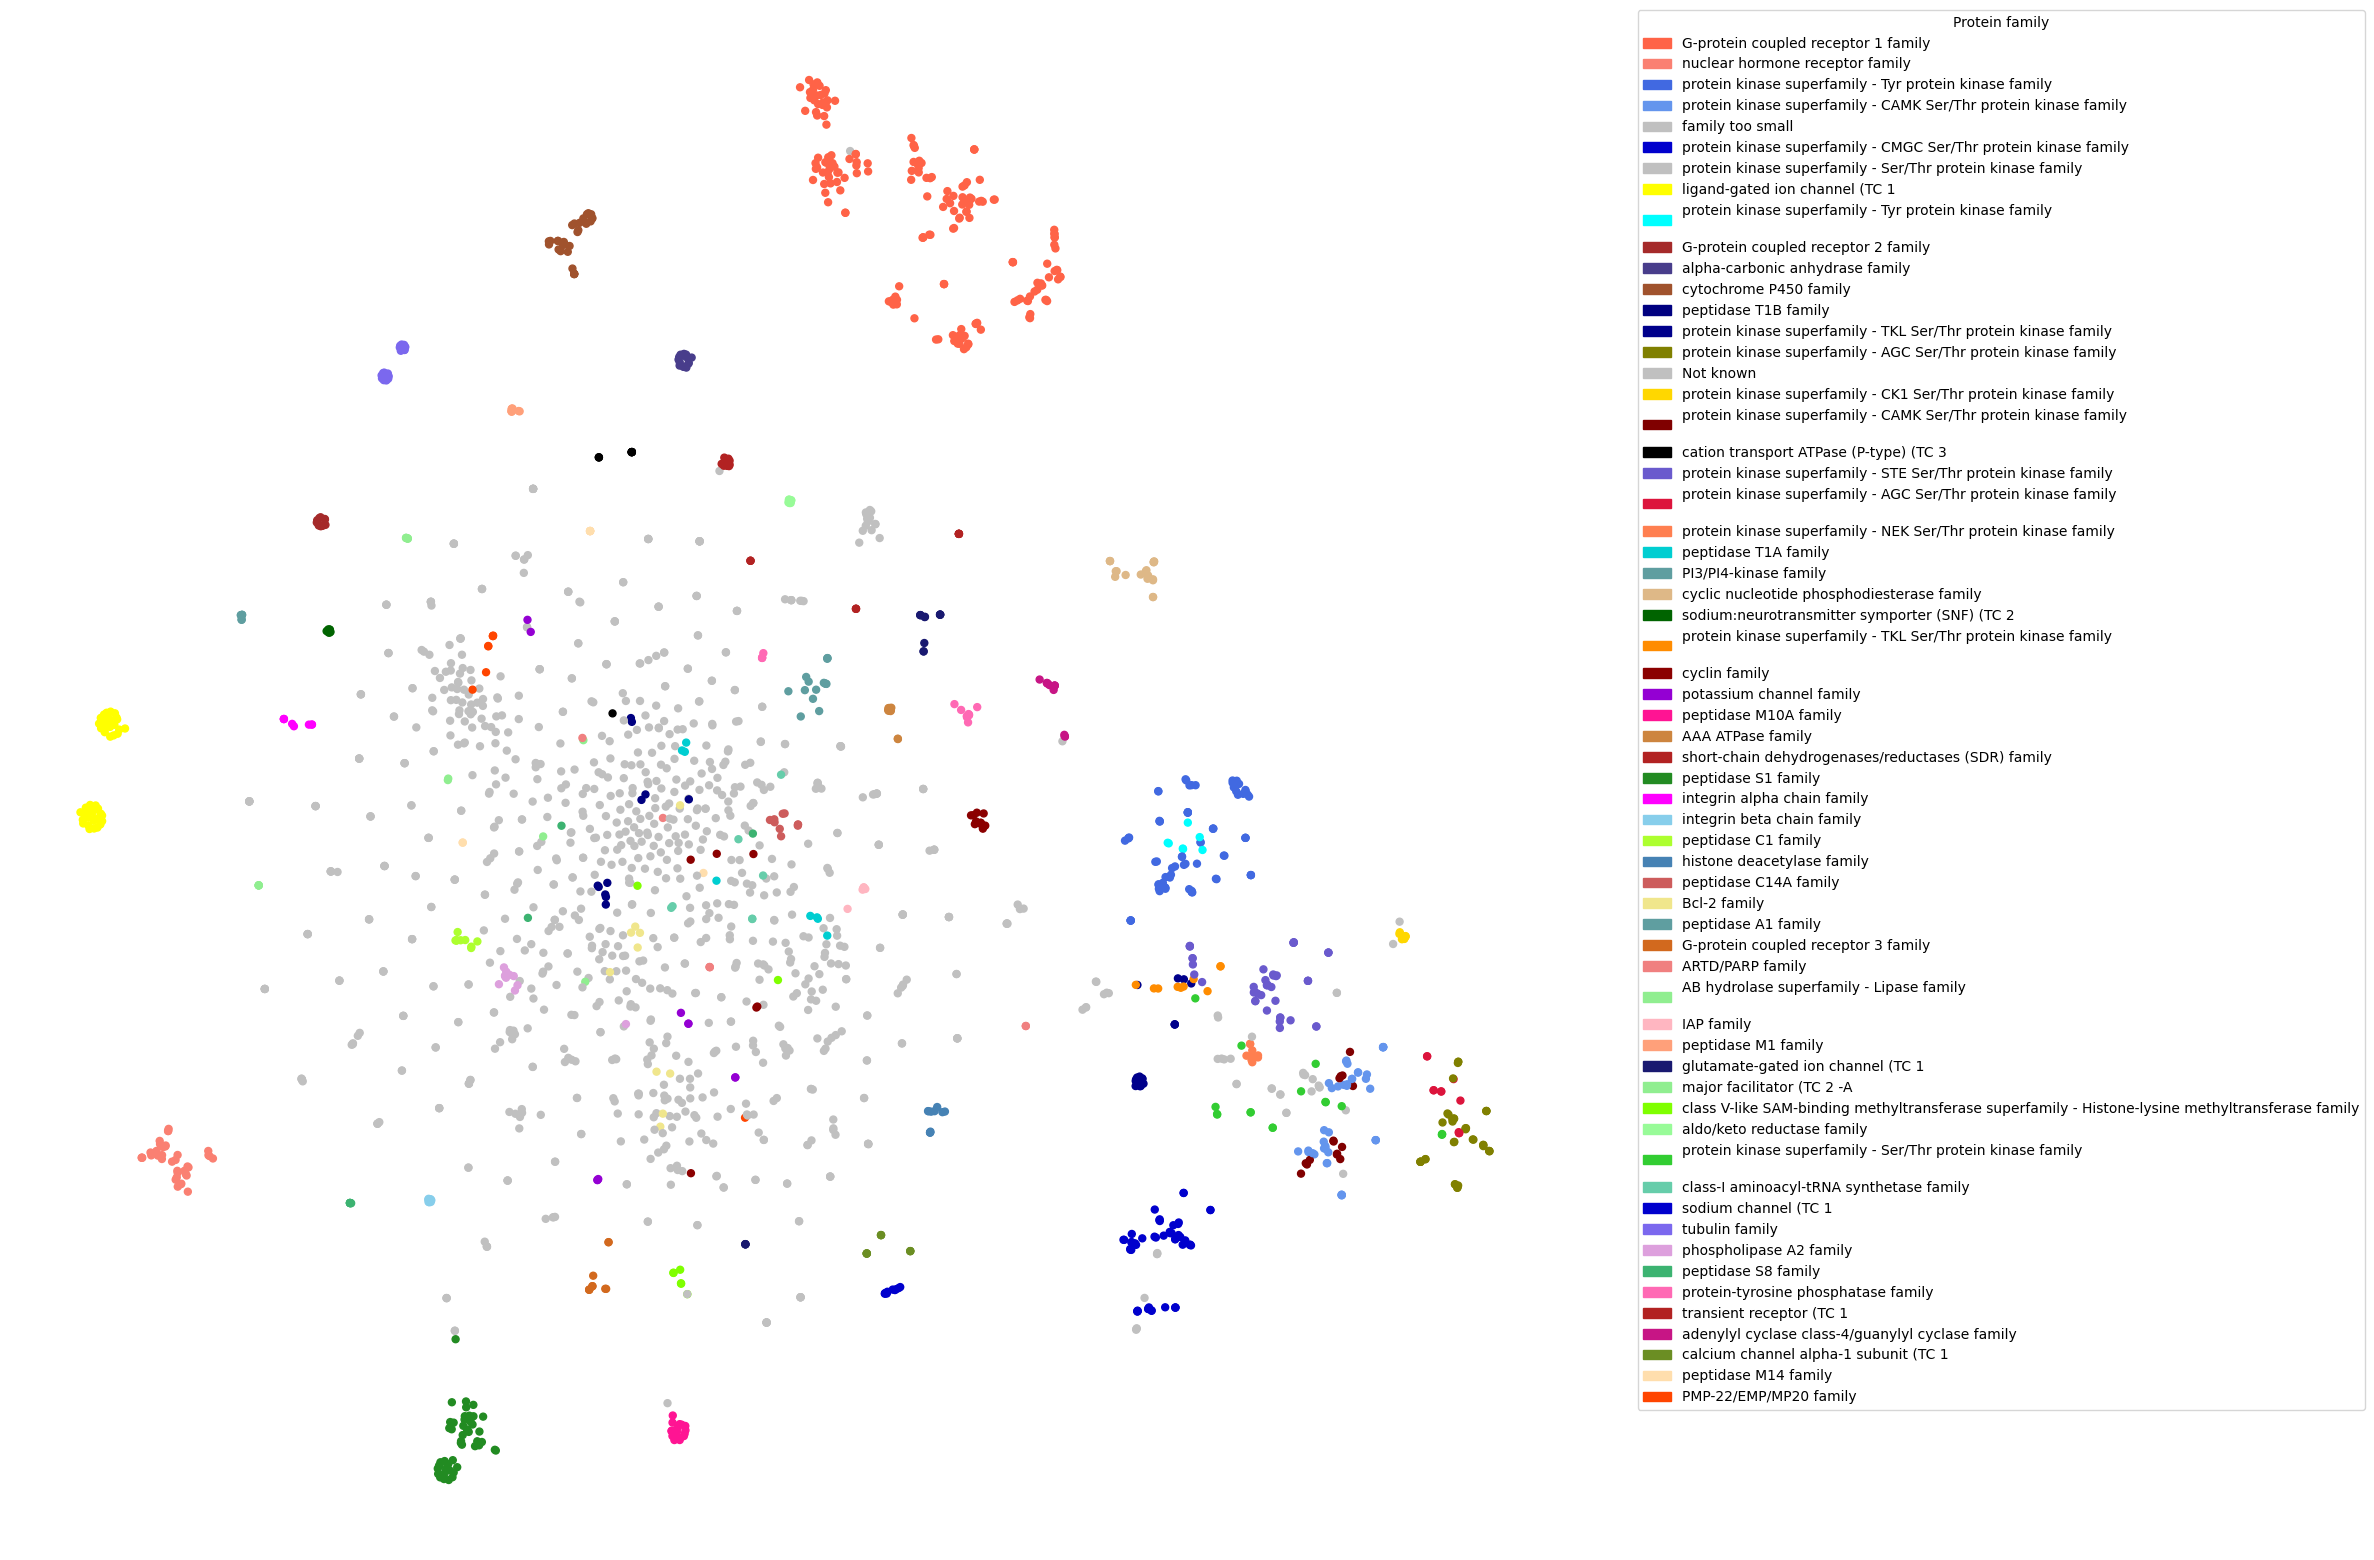

In [36]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


fig, ax = plt.subplots(figsize=(20, 20))

# Define the matching dictionary between family_2 and colors
list_colors = ["tomato","salmon","royalblue","cornflowerblue","silver","mediumblue","silver","yellow","cyan","brown","darkslateblue","sienna","navy","darkblue","olive","silver","gold","maroon","black","slateblue","crimson","coral","darkturquoise","cadetblue","burlywood","darkgreen","darkorange","darkred","darkviolet","deeppink","peru","firebrick","forestgreen","fuchsia","skyblue","greenyellow","steelblue","indianred","khaki","cadetblue","chocolate","lightcoral","lightgreen","lightpink","lightsalmon","midnightblue","lightgreen","chartreuse","palegreen","limegreen","mediumaquamarine","mediumblue","mediumslateblue","plum","mediumseagreen","hotpink","firebrick","mediumvioletred","olivedrab","navajowhite","orangered","orchid","palegreen","paleturquoise","palevioletred","peru","plum","powderblue","rosybrown","royalblue","saddlebrown","salmon","sandybrown","seagreen","sienna","skyblue","slateblue","slategray","springgreen","steelblue","tan","thistle","tomato","turquoise","violet","wheat","silver"]
color_mapping = dict(zip(df_prot_LCIdb["family_2"].drop_duplicates(),list_colors))

# Utiliser le mapping pour obtenir les couleurs correspondantes à chaque famille
colors = df_prot_LCIdb["family_2"].map(color_mapping)

# Tracer les points en utilisant les couleurs
scatter = ax.scatter(x=Y_LCIdb_T [:, 0], y=Y_LCIdb_T [:, 1], c=colors, s=25)

# Créer une légende personnalisée avec les couleurs spécifiées
legend_patches = [mpatches.Patch(color=color_mapping[key], label=key) for key in color_mapping]
ax.legend(handles=legend_patches, title="Protein family", bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

ax.axis('off')

#plt.savefig("/Users/gguichaoua/Dropbox/gwenn/these/chemogenomique/Databases/databases_comparison/prot_cluster.pdf")
# Afficher le nuage de points
plt.show()

